In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset/vietnam_weather_hourly.csv")

In [6]:
unique_locations = df.groupby(["Latitude", "Longitude"]).count().reset_index()
num_locations = len(unique_locations)

In [7]:
print(f"✅ Tổng số tọa độ đã thu thập dữ liệu: {num_locations}")

✅ Tổng số tọa độ đã thu thập dữ liệu: 324


In [8]:
print(unique_locations[["Latitude", "Longitude"]].head(10))

   Latitude  Longitude
0       -10         95
1       -10         97
2       -10         99
3       -10        101
4       -10        103
5       -10        105
6       -10        107
7       -10        109
8       -10        111
9       -10        113


In [ ]:
missing_values = df.isnull().sum()

print("📌 Số lượng giá trị thiếu trong từng cột:")
print(missing_values[missing_values > 0])


📌 Số lượng giá trị thiếu trong từng cột:
PRECTOT    493128
dtype: int64


In [ ]:
df.interpolate(method='linear', inplace=True)

C:\Users\tranh\AppData\Local\Temp\ipykernel_15720\195005142.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [11]:
df.dropna(inplace=True)

In [ ]:
num_days = df["Date"].nunique()
print(f"✅ Số ngày dữ liệu thu thập: {num_days}")

print(f"📌 Ngày đầu tiên có dữ liệu: {df['Date'].min()}")
print(f"📌 Ngày cuối cùng có dữ liệu: {df['Date'].max()}")


✅ Số ngày dữ liệu thu thập: 0
📌 Ngày đầu tiên có dữ liệu: nan
📌 Ngày cuối cùng có dữ liệu: nan


✅ Dữ liệu đã được định dạng lại và lưu vào 'southeast_asia_weather_formatted.csv'

📌 Dữ liệu sau khi định dạng:
      Ngày  Latitude  Longitude  Nhiệt độ (°C)  Độ ẩm riêng  Áp suất (hPa)  Tốc độ gió (m/s)  Lượng mưa (mm)  Bức xạ sóng ngắn (W/m²)
2020-01-01       -10         95          27.51        19.40         101.20              3.14             NaN                     7.67
2020-01-02       -10         95          27.90        19.06         101.27              5.01             NaN                     7.58
2020-01-03       -10         95          28.15        19.55         101.13              6.18             NaN                     7.60
2020-01-04       -10         95          28.17        19.49         100.97              6.13             NaN                     7.60
2020-01-05       -10         95          27.94        18.99         100.98              5.85             NaN                     7.69
2020-01-06       -10         95          27.76        18.09         101.05          

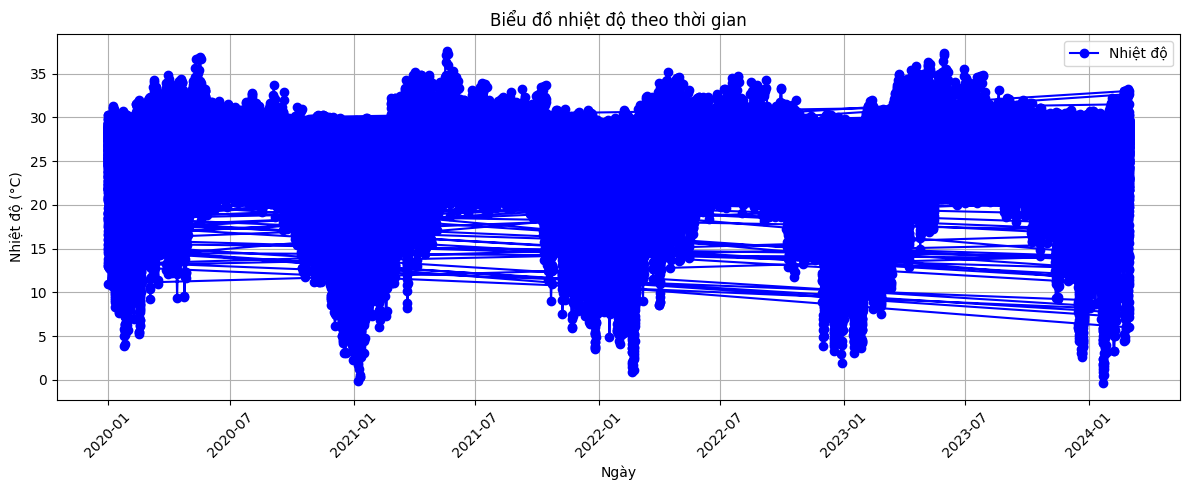

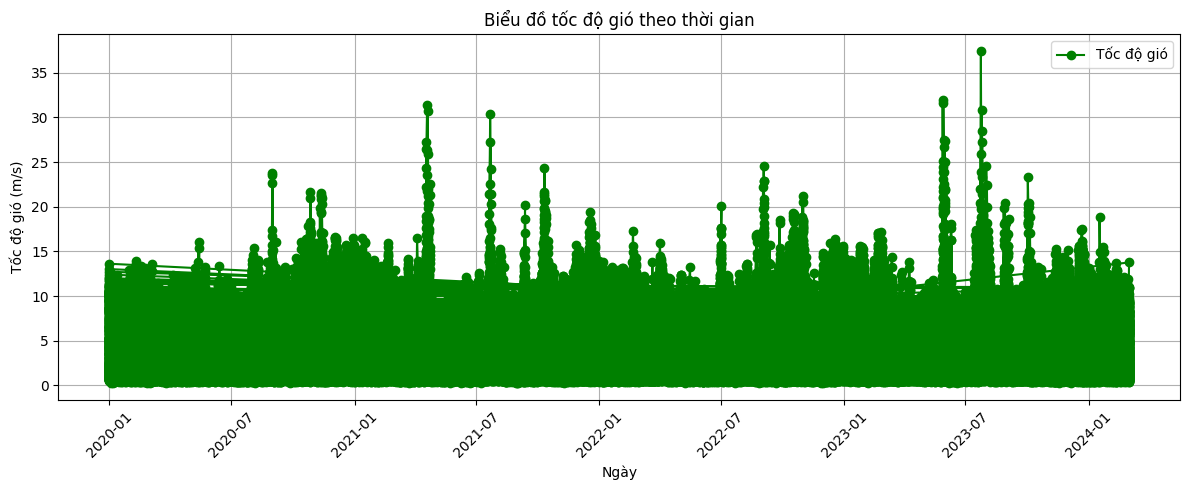

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/vietnam_weather_hourly.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.rename(columns={
    'Date': 'Ngày',
    'T2M': 'Nhiệt độ (°C)',
    'QV2M': 'Độ ẩm riêng',
    'PS': 'Áp suất (hPa)',
    'WS10M': 'Tốc độ gió (m/s)',
    'PRECTOT': 'Lượng mưa (mm)',
    'CLRSKY_SFC_SW_DWN': 'Bức xạ sóng ngắn (W/m²)'
}, inplace=True)

df.fillna(df.mean(), inplace=True)

df = df.round(2)

df.to_csv('dataset/vietnam_weather.csv', index=False)

print("✅ Dữ liệu đã được định dạng lại và lưu vào 'southeast_asia_weather_formatted.csv'")

print("\n📌 Dữ liệu sau khi định dạng:")
print(df.head(10).to_string(index=False))

plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Nhiệt độ (°C)'], marker='o', linestyle='-', color='blue', label='Nhiệt độ')
plt.title('Biểu đồ nhiệt độ theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Tốc độ gió (m/s)'], marker='o', linestyle='-', color='green', label='Tốc độ gió')
plt.title('Biểu đồ tốc độ gió theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Tốc độ gió (m/s)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('dataset/processed/train_data.csv', nrows=100)
print(df.head(10).to_string())

              Datetime  Latitude  Longitude  CLRSKY_SFC_SW_DWN    PS     T2M    QV2M  WS10M  PRECTOTCORR  hour  day  month  season
0  2022-01-01 00:00:00      10.0      102.0              17.89  6.65    0.00  101.38  28.35         0.21     0    1      1       1
1  2022-01-01 00:00:00      10.0      102.0              17.05  3.95    0.00  101.36  27.52         0.80     0    1      1       1
2  2022-01-01 00:00:00      10.0      102.0              16.95  3.94    0.00  101.39  27.53         0.35     0    1      1       1
3  2022-01-01 00:00:00      10.0      102.0              16.91  4.22    0.00  101.42  27.52         0.19     0    1      1       1
4  2022-01-01 00:00:00      10.0      102.0              16.89  4.66    0.00  101.41  27.47         0.01     0    1      1       1
5  2022-01-01 00:00:00      10.0      102.0              16.84  4.98    0.00  101.35  27.38         0.00     0    1      1       1
6  2022-01-01 00:00:00      10.0      102.0              16.79  5.20    0.00  101.2

In [1]:
import pandas as pd
df = pd.read_csv('dataset/processed/train_data.csv')
print(df.tail(10).to_string())

MemoryError: Unable to allocate 512. KiB for an array with shape (65536,) and data type int64

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import pickle

scaler_file = "dataset/processed/scaler.pkl"

with open(scaler_file, 'rb') as f:
    scaler_X, scaler_y = pickle.load(f)

feature_cols = ["Latitude", "Longitude", "hour", "day", "month", "season", 
                "WS10M", "QV2M", "PS", "PRECTOTCORR", "T2M", "CLRSKY_SFC_SW_DWN"]

target_cols = ["CLRSKY_SFC_SW_DWN", "PS", "T2M", "QV2M", "WS10M", "PRECTOTCORR"] 

timesteps = 24
batch_size = 256

test_file = "dataset/processed/test_data.csv"

checkpoint_path = "model/best_model.h5"
model = load_model(checkpoint_path)
model.summary()

def data_generator(file_path, feature_cols, target_cols, batch_size=256, timesteps=24):
    dtype_dict = {col: np.float32 for col in feature_cols + target_cols}
    dtype_dict.update({"hour": np.int8, "day": np.int8, "month": np.int8, "season": np.int8})

    for chunk in pd.read_csv(file_path, chunksize=batch_size * 5, dtype=dtype_dict, parse_dates=["Datetime"], low_memory=True):
        chunk = chunk.sort_values(by=["Datetime"])
        
        X_scaled = scaler_X.transform(chunk[feature_cols])
        y_scaled = scaler_y.transform(chunk[target_cols])

        X_batch, y_batch = [], []
        for i in range(len(chunk) - timesteps - 24):
            X_batch.append(X_scaled[i:i+timesteps])
            y_batch.append(y_scaled[i+timesteps:i+timesteps+24])

        yield np.array(X_batch), np.array(y_batch)

test_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(test_file, feature_cols, target_cols, batch_size, timesteps),
    output_signature=(
        tf.TensorSpec(shape=(None, timesteps, len(feature_cols)), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 24, len(target_cols)), dtype=tf.float32),
    )
).prefetch(tf.data.AUTOTUNE)

loss, mae = model.evaluate(test_dataset)
print(f"✅ Kết quả đánh giá trên dữ liệu test: Loss={loss:.4f}, MAE={mae:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           72192     
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 144)               9360      
                                                                 
 reshape (Reshape)           (None, 24, 6)             0         
                                                                 
Total params: 130,960
Trainable params: 130,960
Non-trai

KeyboardInterrupt: 